# Support Vector Machines 
## Instructions
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('intrusion_detection.csv')

**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

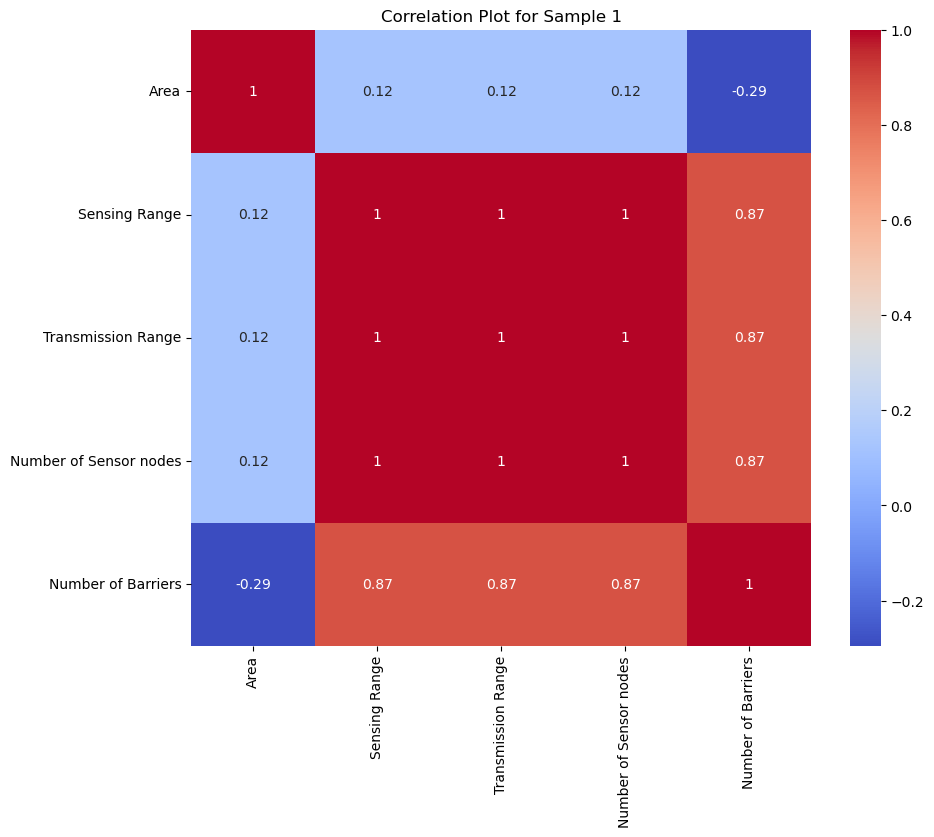

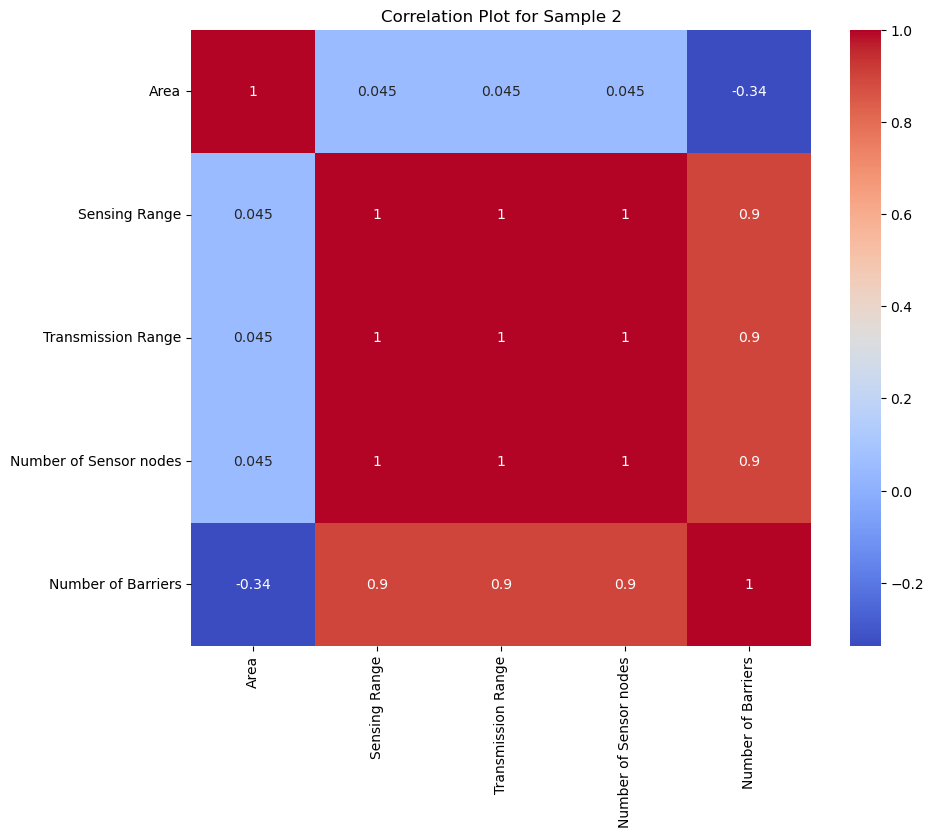

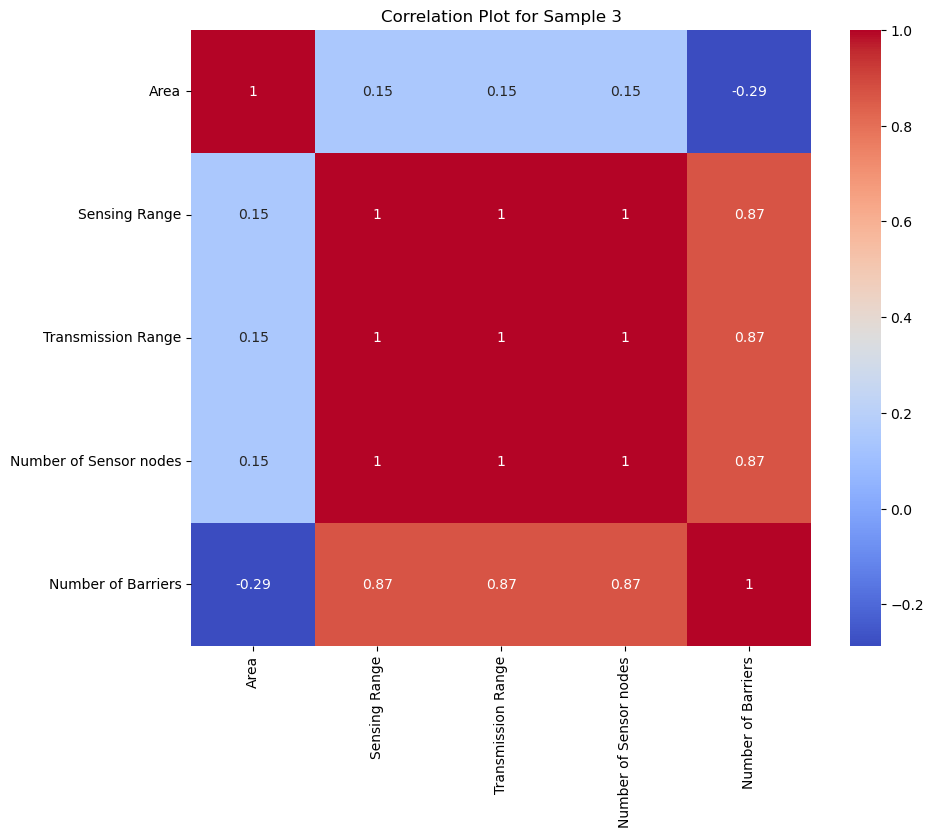

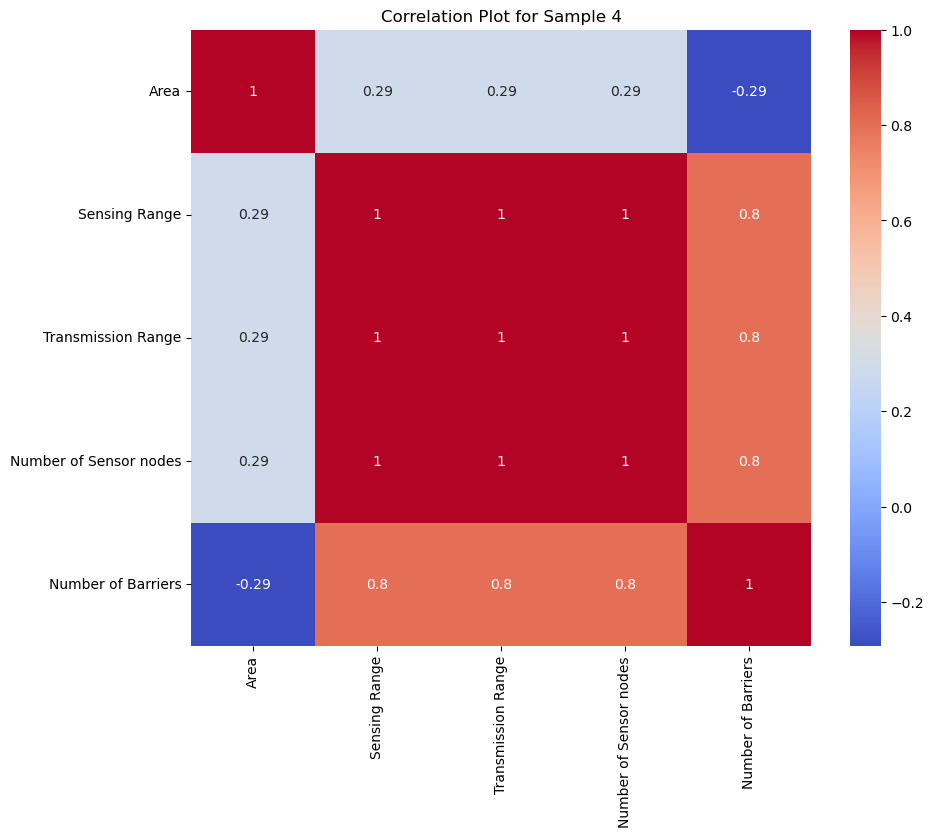

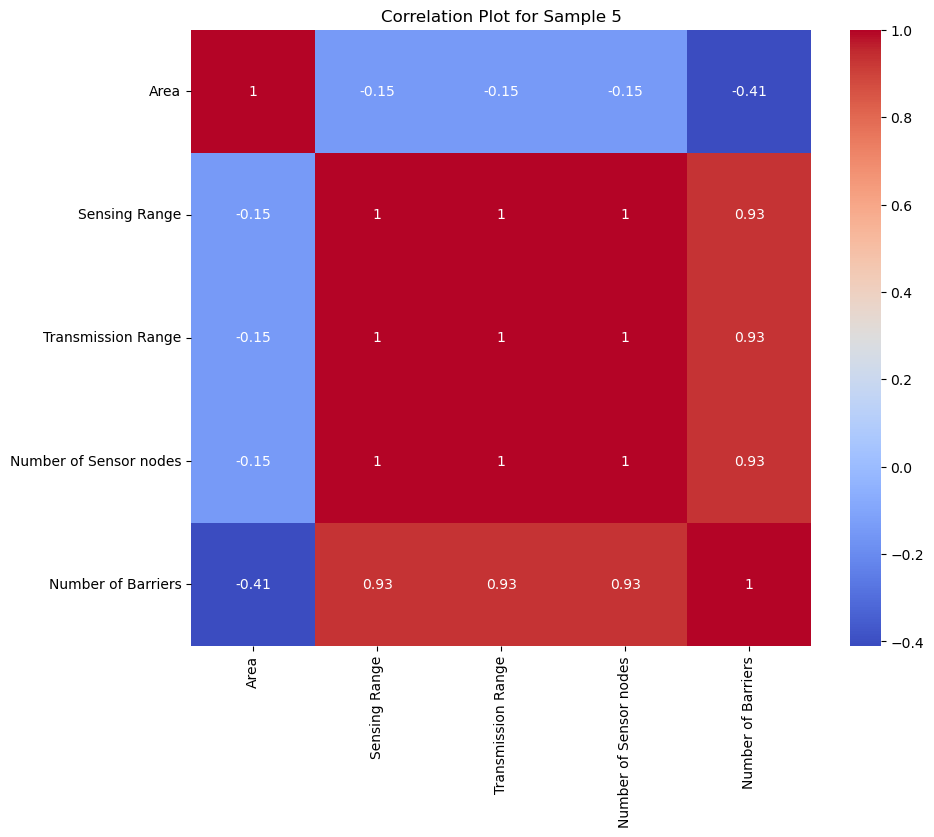

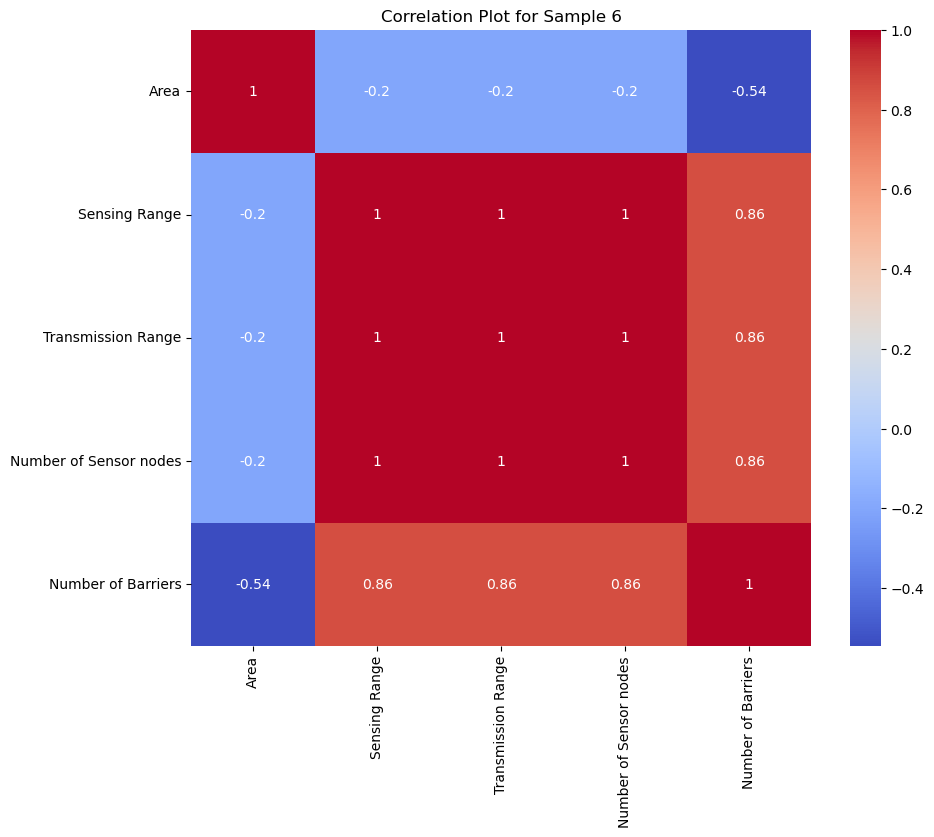

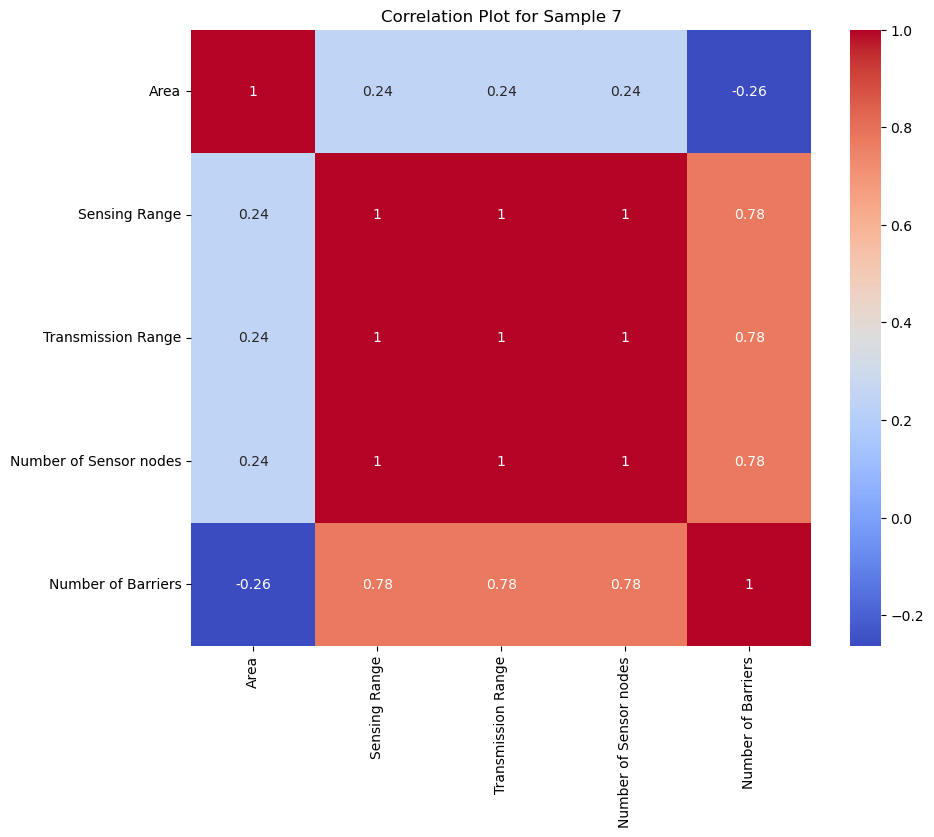

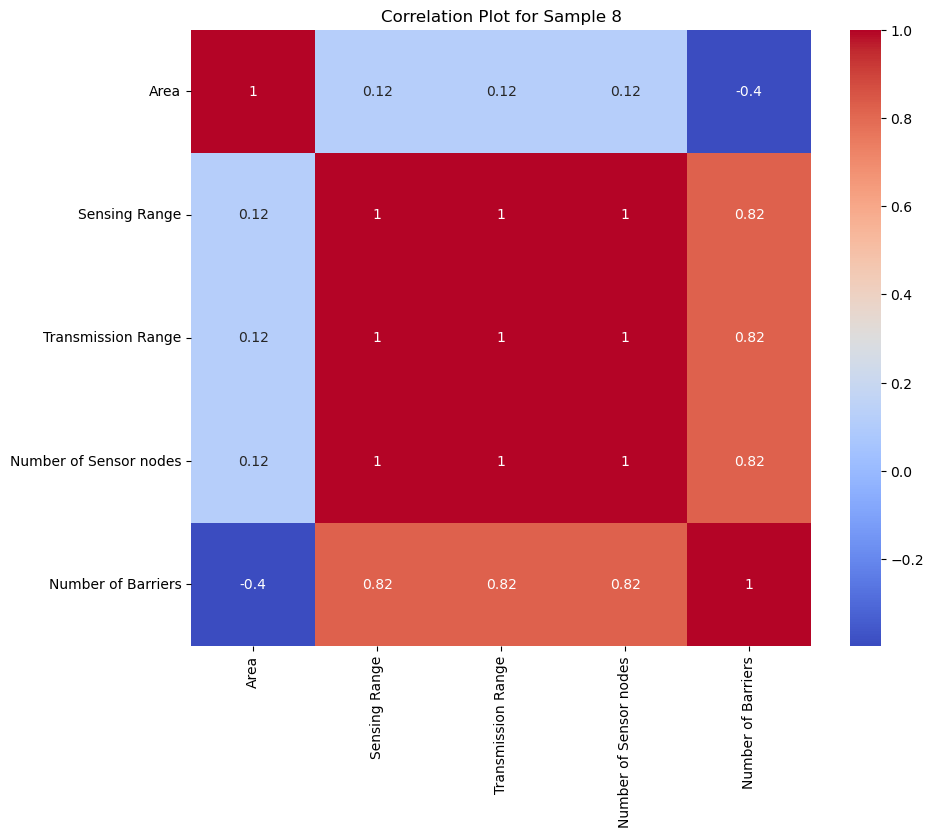

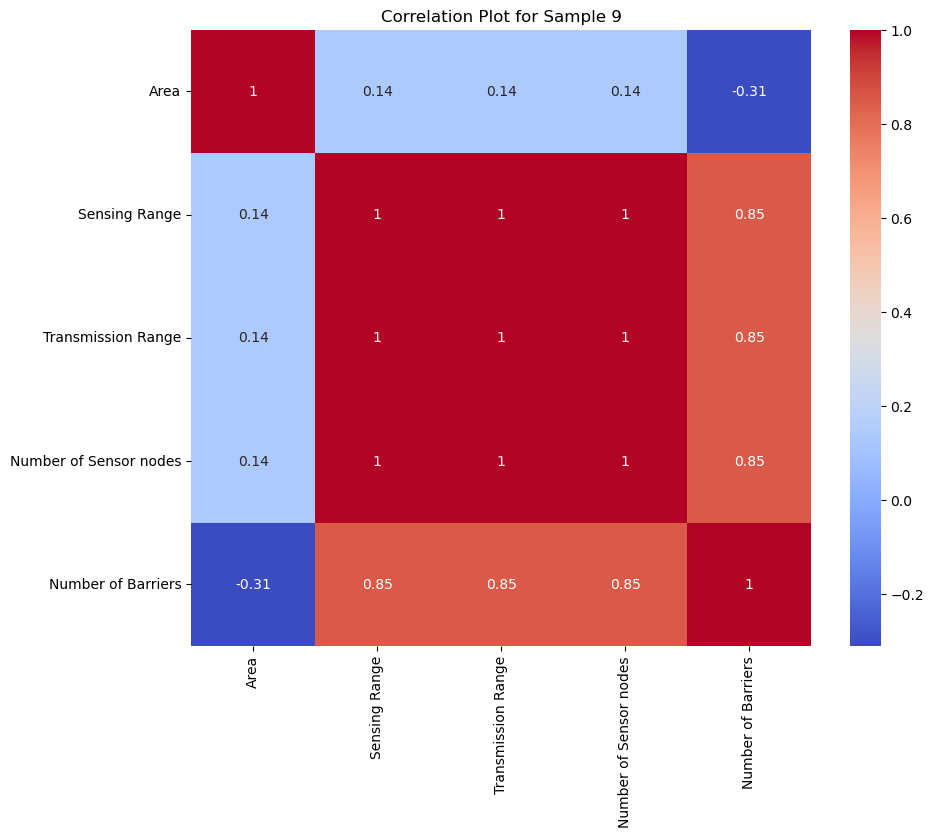

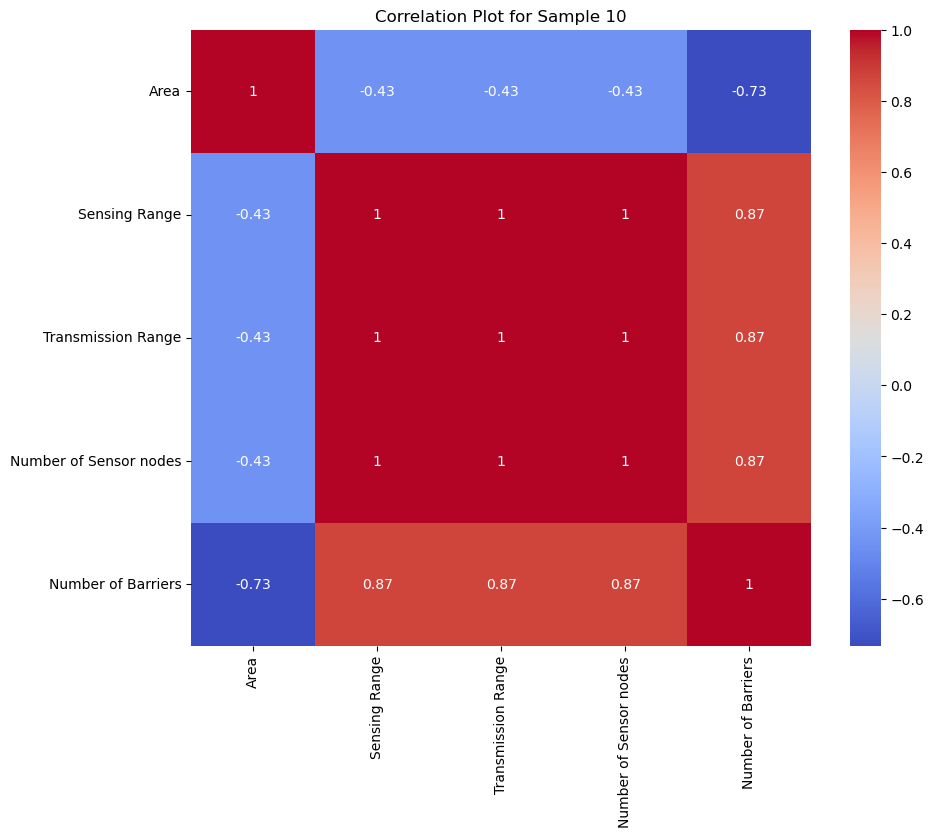

In [18]:
# Function to create correlation plots for subsamples
def correlation_plots(data, num_samples=10, sample_size=0.1):
    for i in range(num_samples):
        sample = data.sample(frac=sample_size)
        plt.figure(figsize=(10, 8))
        sns.heatmap(sample.corr(), annot=True, cmap='coolwarm')
        plt.title(f'Correlation Plot for Sample {i+1}')
        plt.show()

correlation_plots(data, num_samples=10, sample_size=0.1)

**TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced**
**TASK (Regression): If your problem is a regression problem visually the distribution of your target variabe**

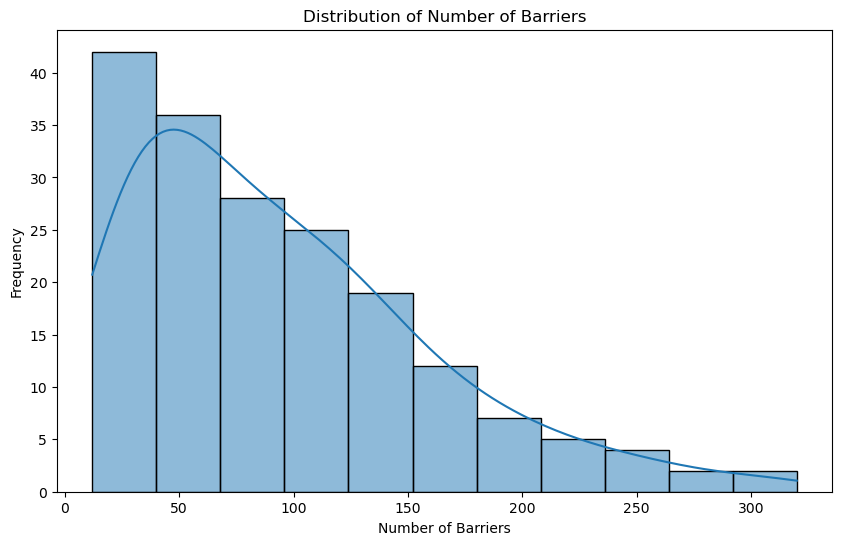

In [19]:
# Regression
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['Number of Barriers'], kde=True)
plt.title('Distribution of Number of Barriers')
plt.xlabel('Number of Barriers')
plt.ylabel('Frequency')
plt.show()

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

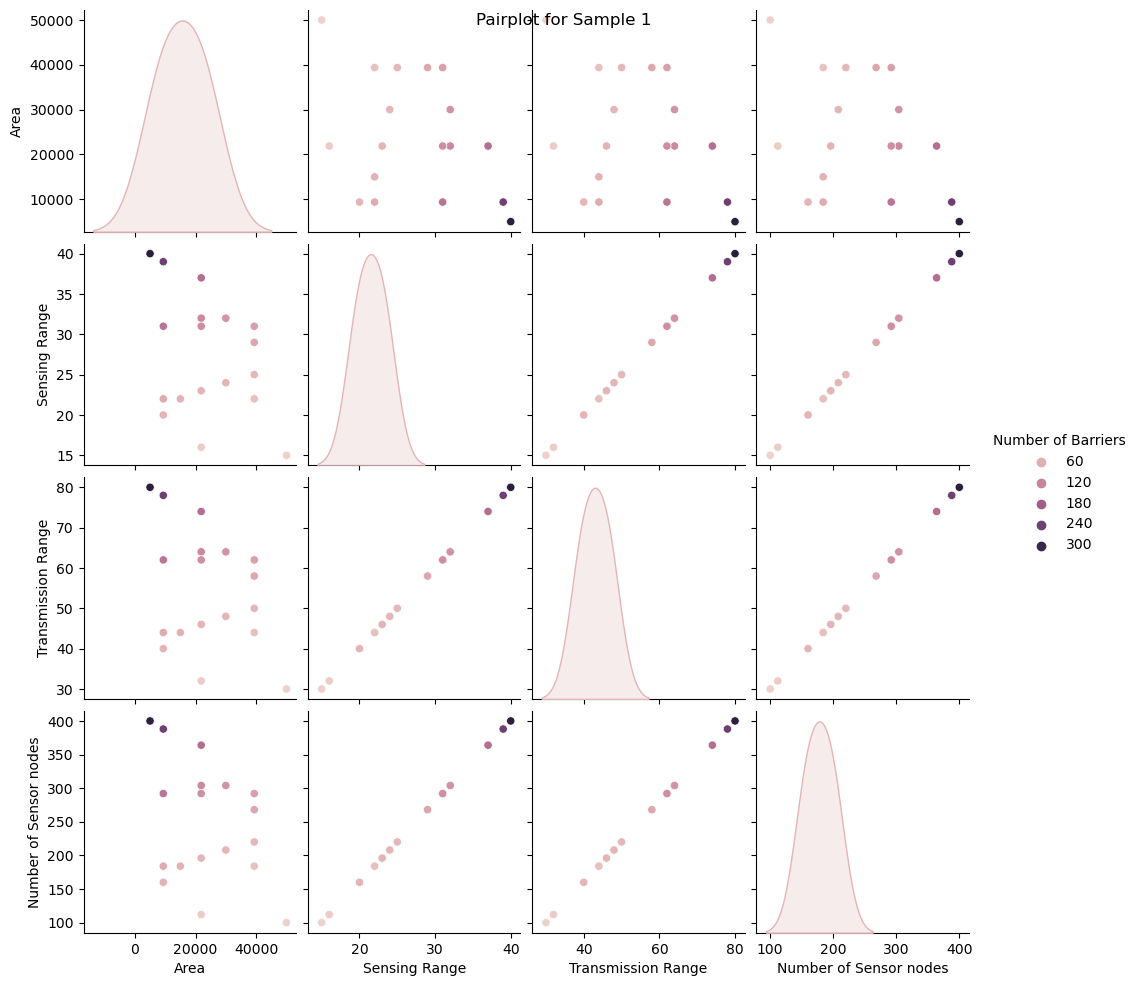

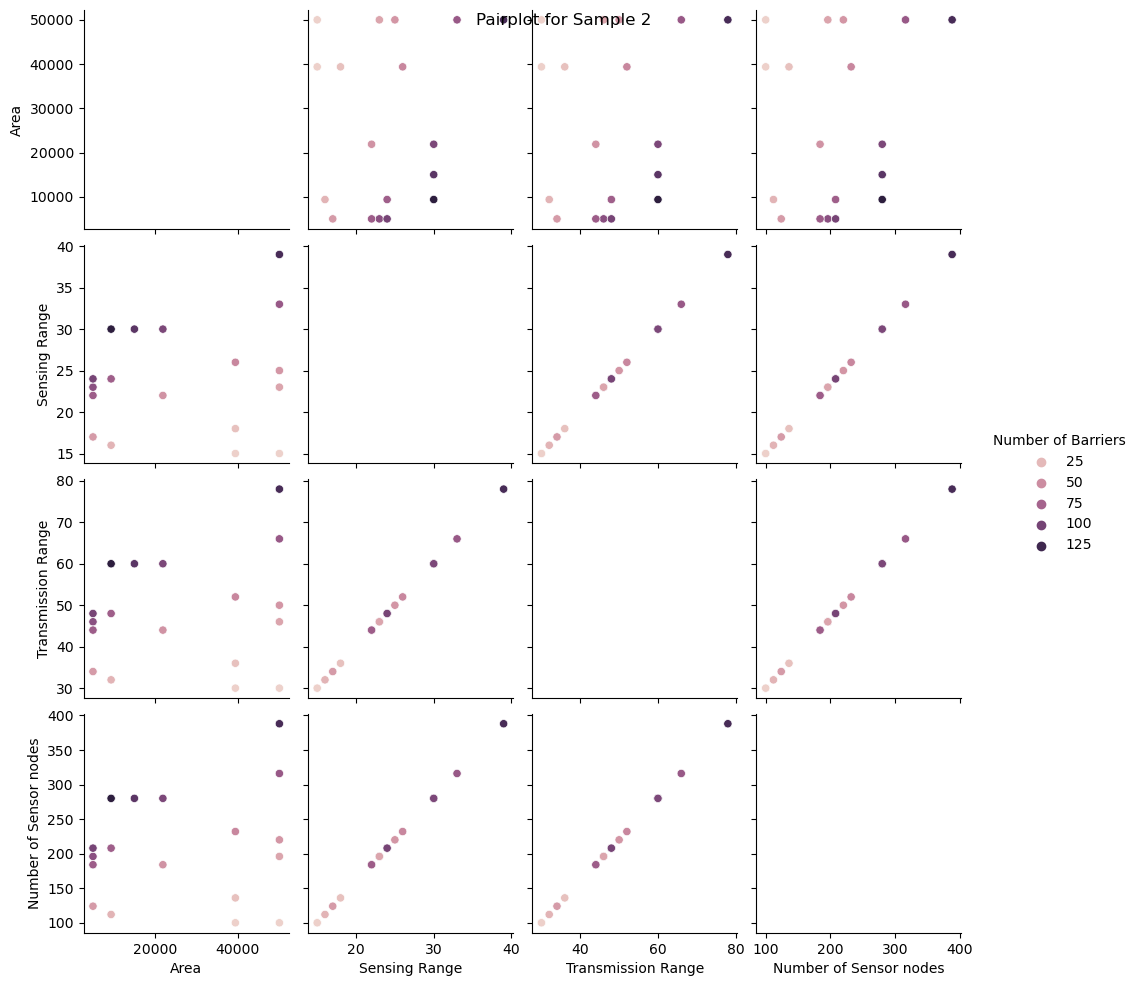

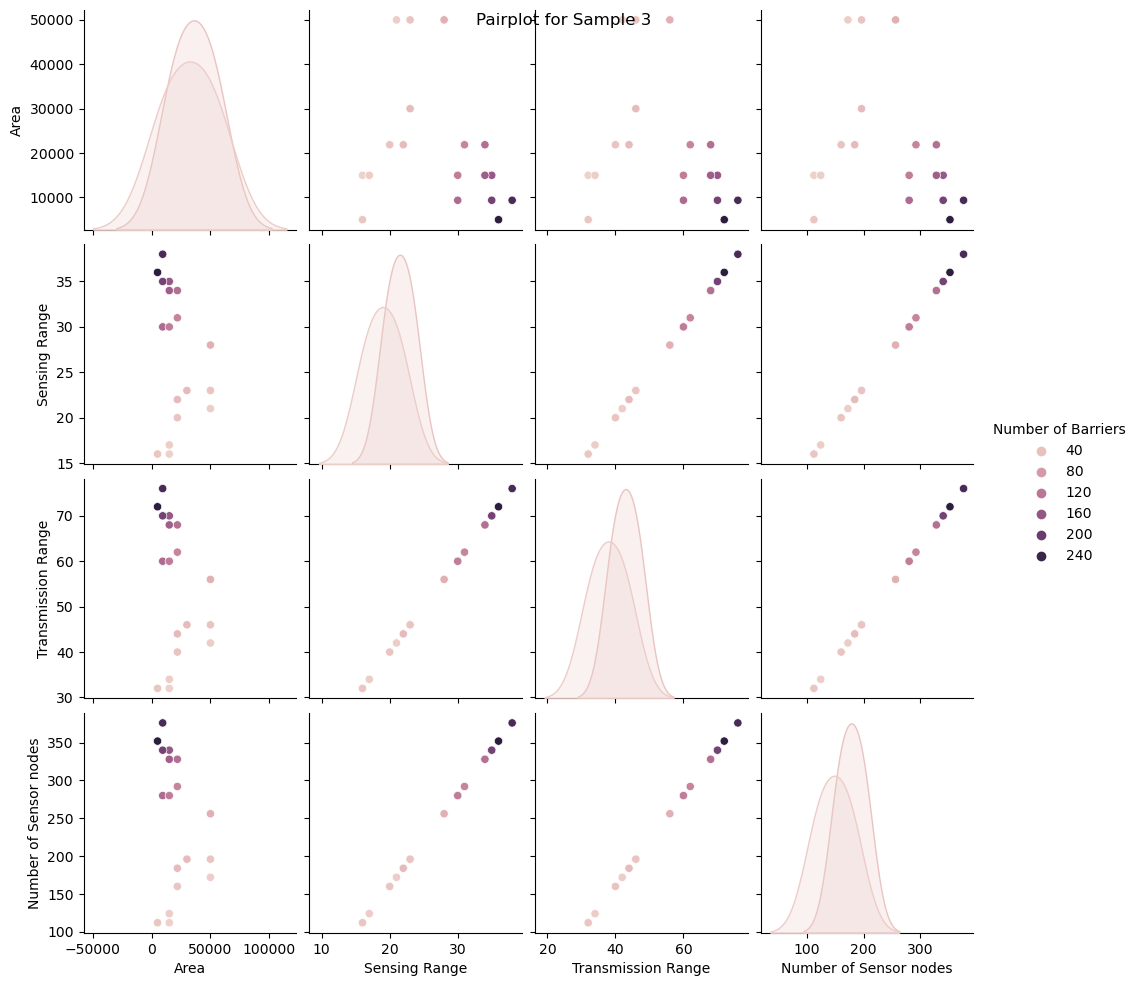

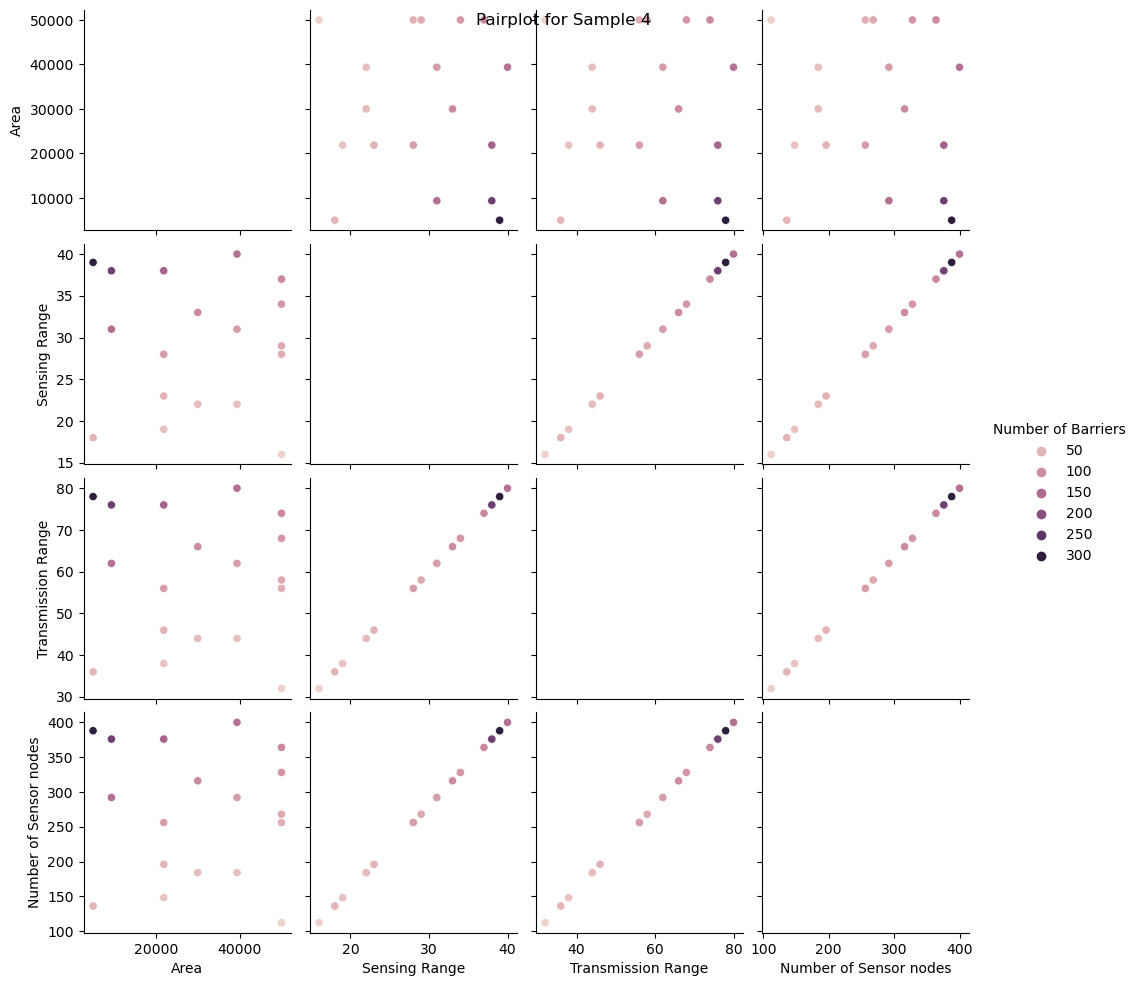

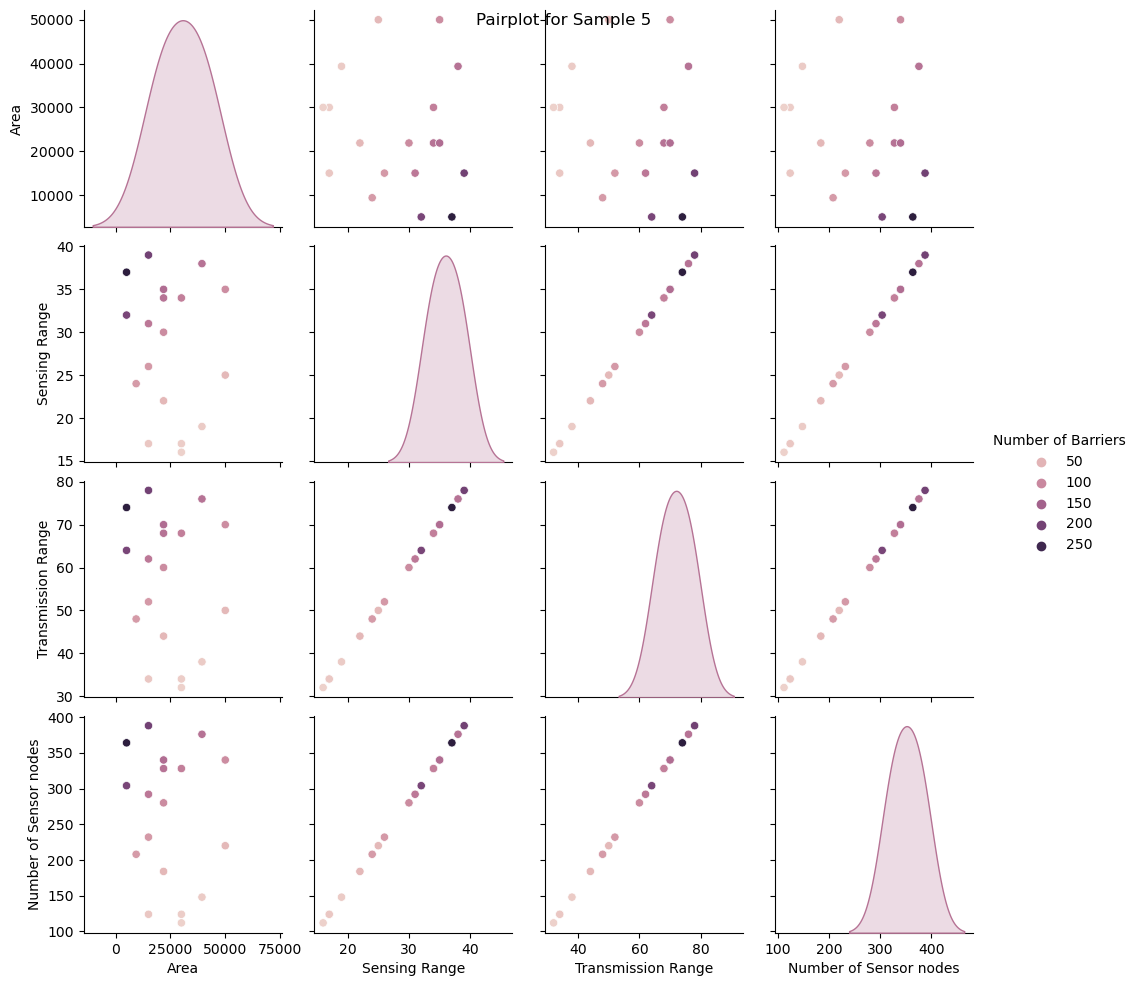

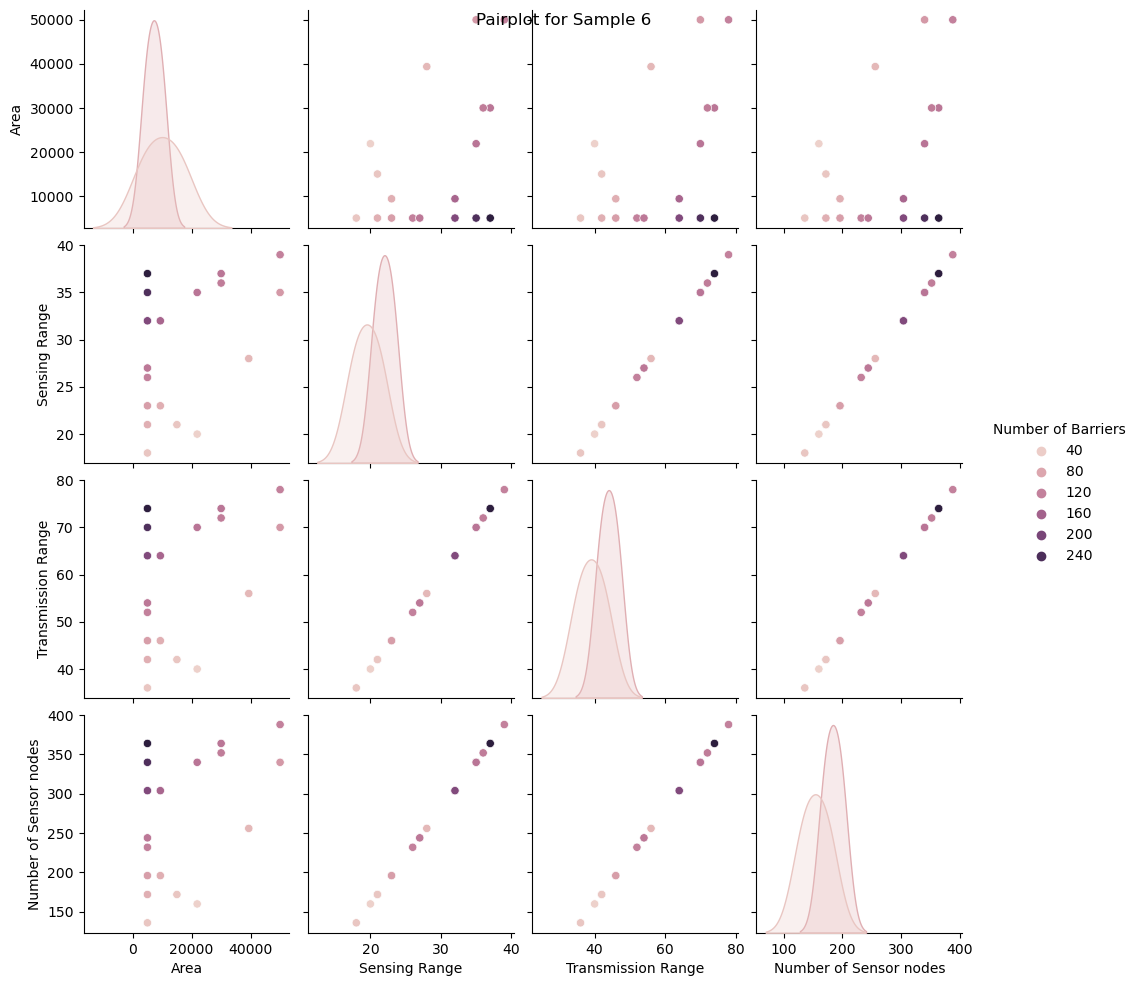

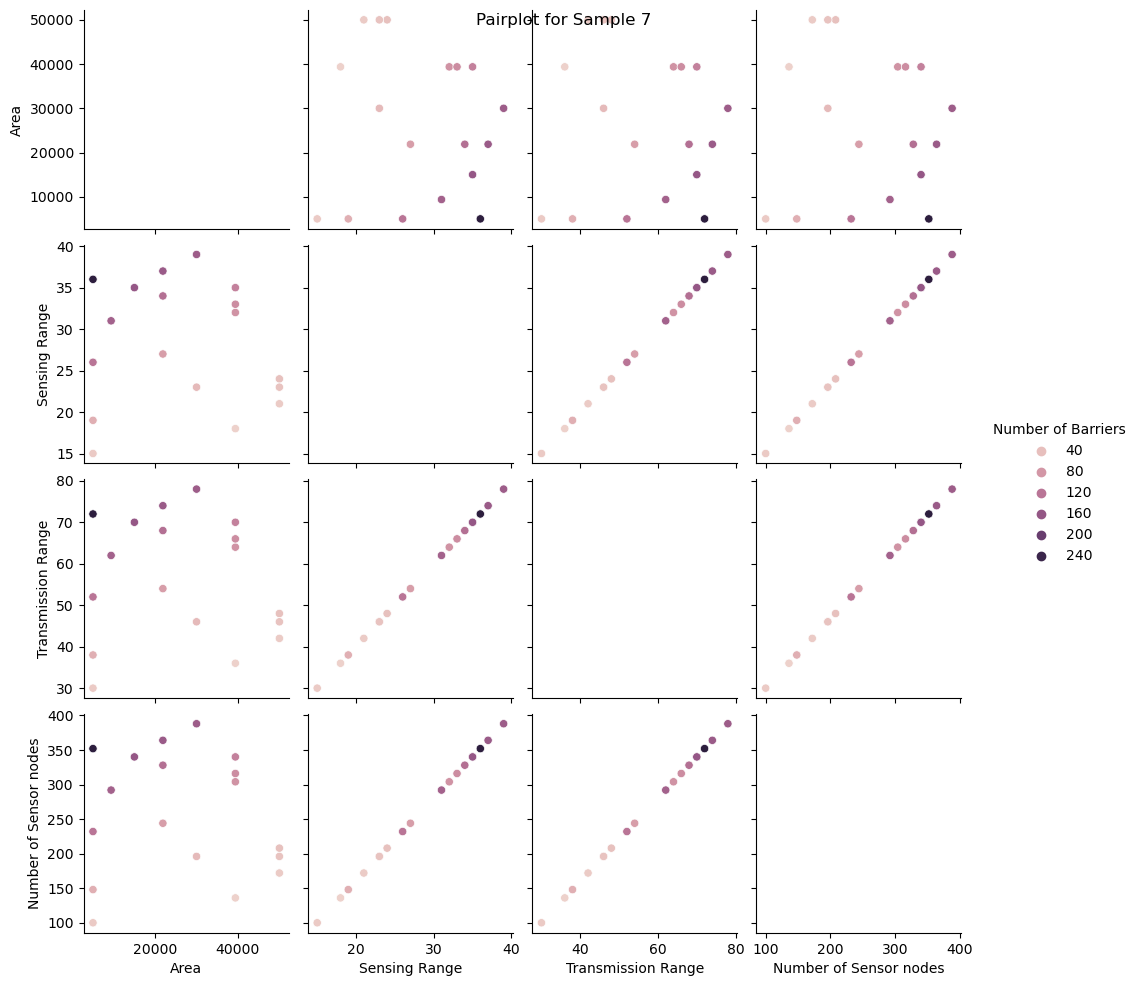

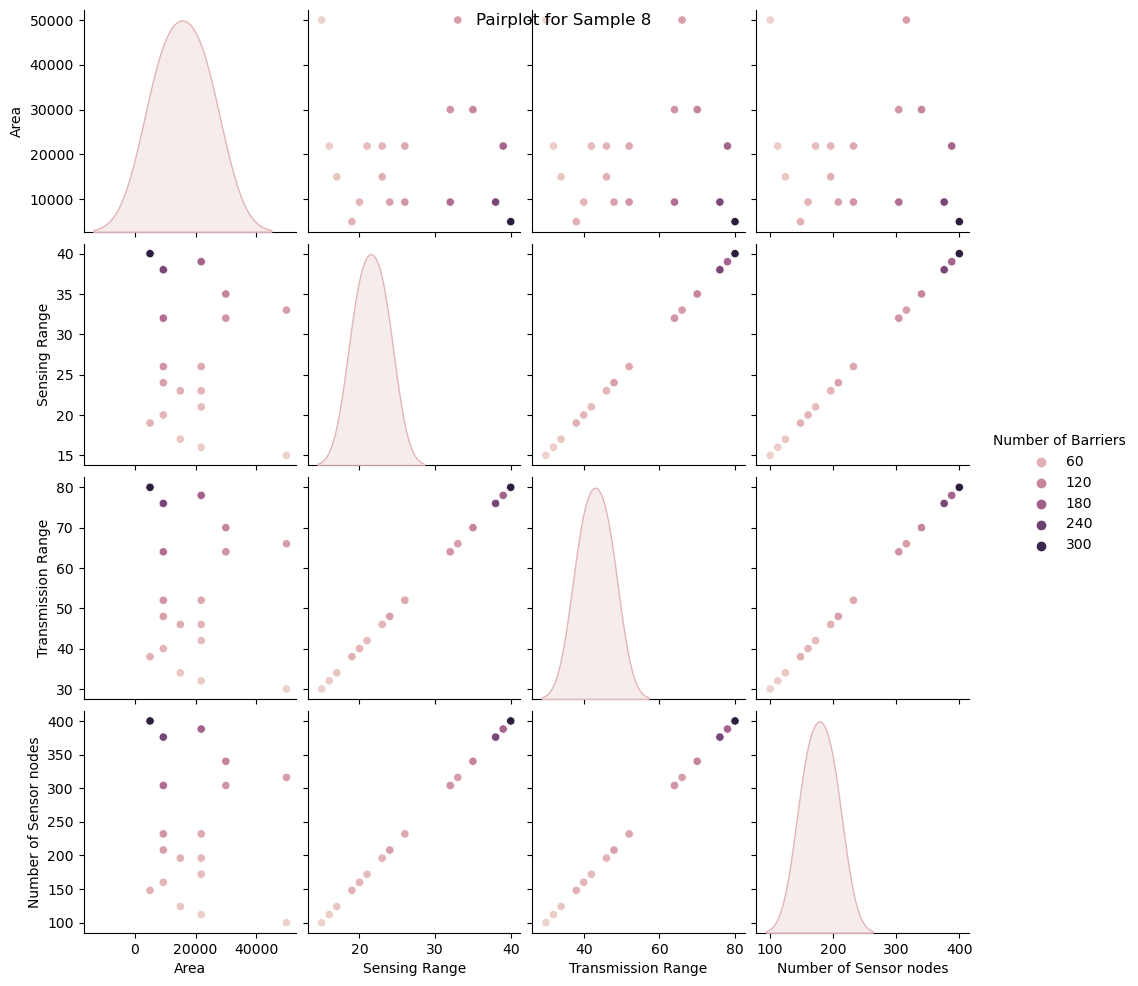

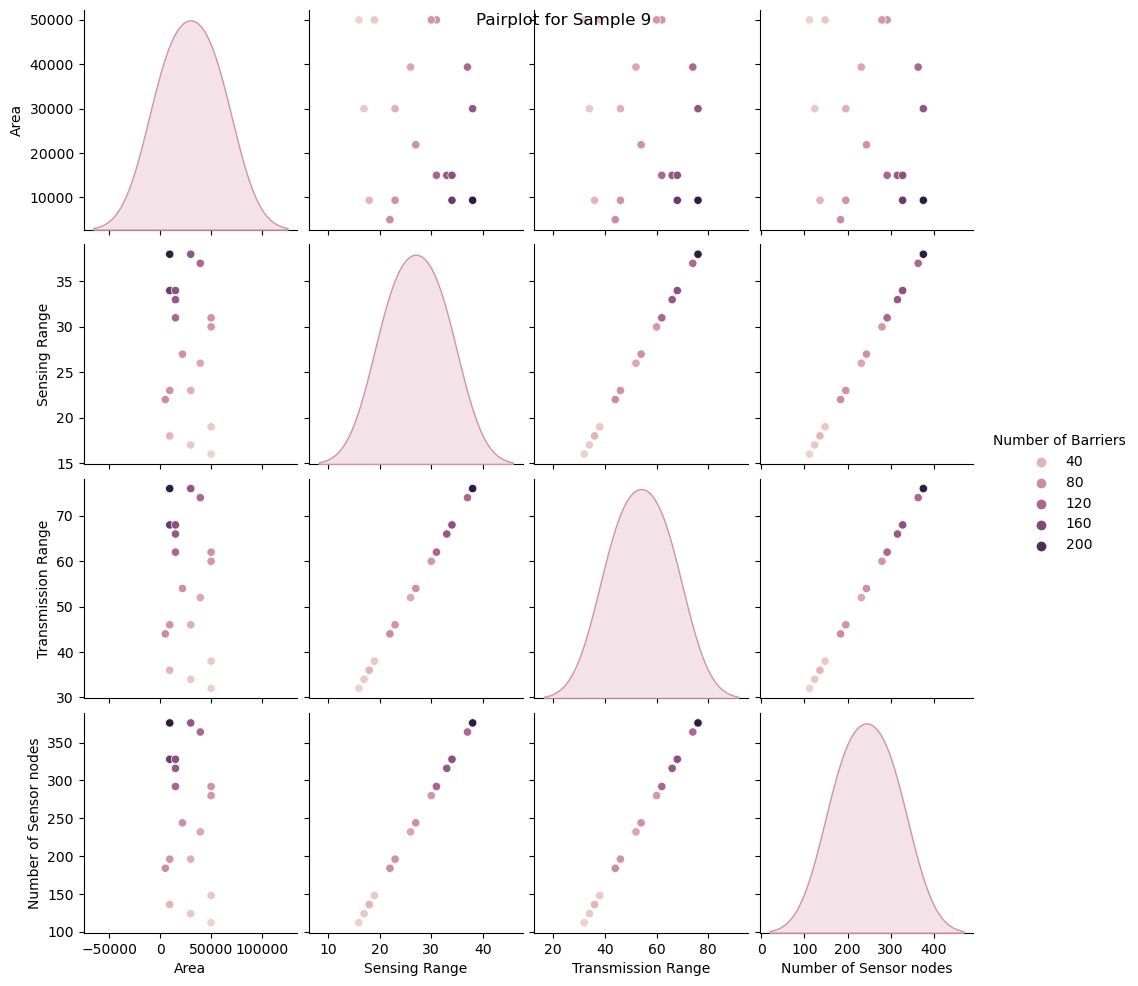

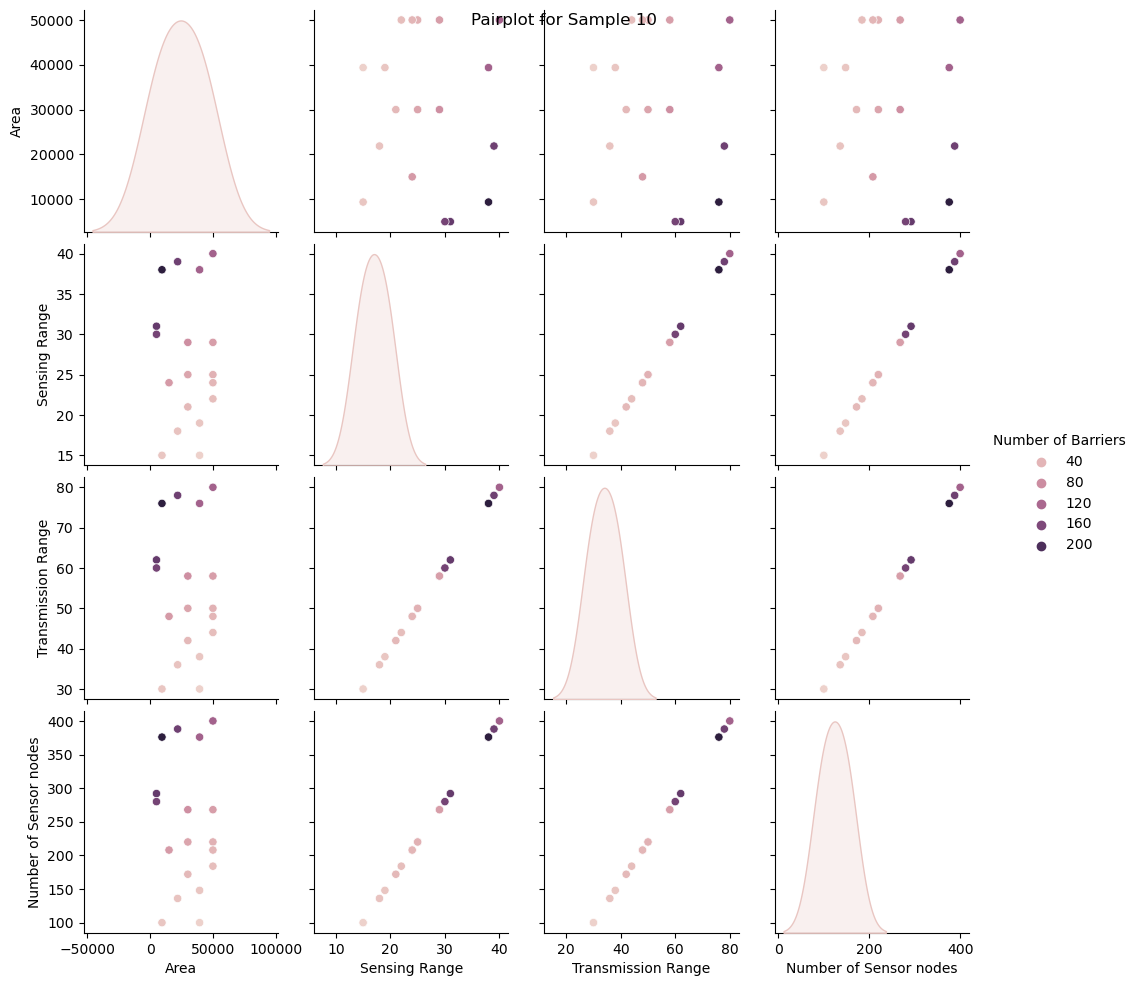

In [20]:
# Function to create pairplots for subsamples
def pairplots(data, target, num_samples=10, sample_size=0.1):
    for i in range(num_samples):
        sample = data.sample(frac=sample_size)
        sns.pairplot(sample, hue=target)
        plt.suptitle(f'Pairplot for Sample {i+1}')
        plt.show()

pairplots(data, 'Number of Barriers', num_samples=10, sample_size=0.1)

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

<Figure size 1000x800 with 0 Axes>

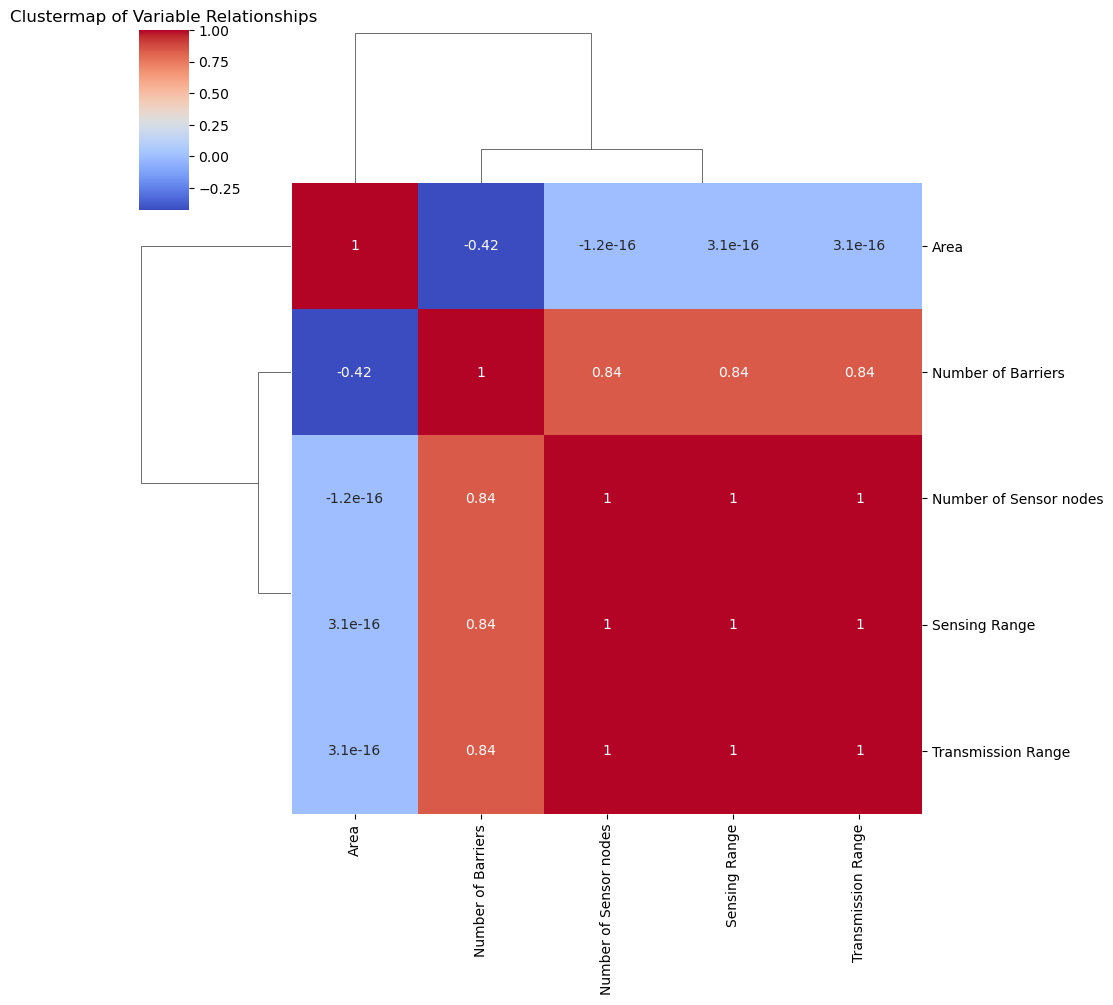

In [21]:
# Clustermap to explore relationships between variables
plt.figure(figsize=(10, 8))
sns.clustermap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Clustermap of Variable Relationships')
plt.show()

**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

In [ ]:
# Prepare the data for SVM modeling
X = data.drop('Number of Barriers', axis=1)
y = data['Number of Barriers']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM modeling
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Check performance
print("Initial SVM Model Performance")
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

# GridSearchCV to improve performance
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}
cv = StratifiedKFold(n_splits=3)  # Adjusted n_splits to 3
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=cv)
grid.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters: ", grid.best_params_)
best_model = grid.best_estimator_

# Performance of the best model
y_pred_best = best_model.predict(X_test)
print("Improved SVM Model Performance")
print(classification_report(y_test, y_pred_best))
print(f'Accuracy: {accuracy_score(y_test, y_pred_best):.4f}')

Initial SVM Model Performance
              precision    recall  f1-score   support

          22       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       0.0
          25       0.00      0.00      0.00       1.0
          28       0.00      0.00      0.00       1.0
          32       0.00      0.00      0.00       2.0
          37       0.00      0.00      0.00       1.0
          39       0.00      0.00      0.00       2.0
          40       0.00      0.00      0.00       1.0
          42       0.00      0.00      0.00       1.0
          44       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       1.0
          48       0.00      0.00      0.00       0.0
          51       0.00      0.00      0.00       1.0
          55       0.00      0.00      0.00       1.0
          60       0.00      0.00      0.00       2.0
          63       0.00      0.00      0.00       1.0
          69       0.00      0.00      0.00       1

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_cla